In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import utils
from sklearn import metrics
import matplotlib
from woe import WOE

plt.style.use('seaborn')
sns.set(font_scale=1)
pd.set_option('display.max_columns', 500)


In [2]:
path        = '../data/input/input_pkl/train/'
df_train    = utils.read_pickles(path)

100%|██████████| 5/5 [00:00<00:00, 11.55it/s]


In [3]:
train_columns = [c for c in df_train.columns if c not in ['ID_code', 'target']]

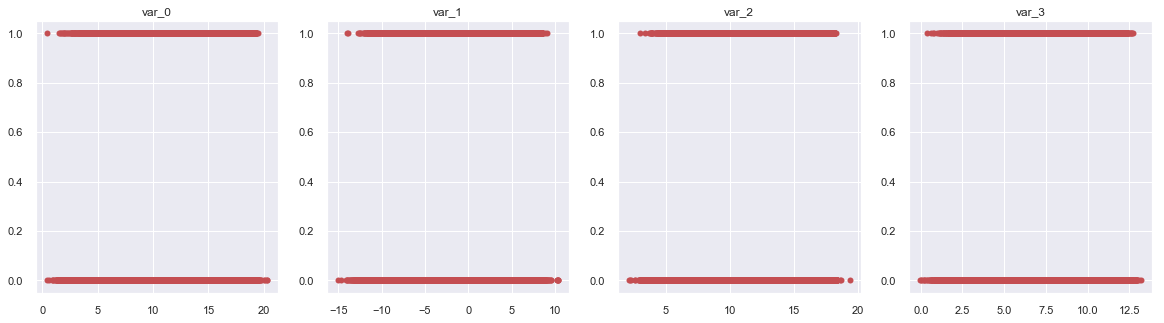

In [9]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
k = 0
graph_range = [141,142,143,144]
start = 4*k
for i in range(4):
    plt.subplot(graph_range[i])
    plt.plot(df_train[train_columns[start+i]],df_train['target'],'ro')
    plt.title(train_columns[start+i])
plt.show() 

In [4]:
X               = df_train[train_columns]
X               = np.array(X)

y               = df_train['target']
woe_application = WOE()
woe_result      = woe_application.woe(X,y)

In [5]:
df_woe              = pd.DataFrame()
df_woe['variables'] = train_columns
df_woe['woe']       = woe_result[1]
df_woe_better       = df_woe[df_woe['woe'] >= 0.02]

In [7]:
df_woe_better.shape

(39, 2)

In [ ]:
#< 0.02	useless for prediction
#0.02 to 0.1	Weak predictor
#0.1 to 0.3	Medium predictor
#0.3 to 0.5	Strong predictor
#>0.5	Suspicious or too good to be true